### Imports
The *gym_anytrading* and *crypto_env* imports are needed to create a gymnasium environment.

In [5]:
import utils
import crypto_env

import gym_anytrading
import gymnasium as gym
import matplotlib.pyplot as plt
import pandas as pd
import quantstats as qs

from stable_baselines3 import A2C, PPO, DQN

### Defining the DataFrame

In [6]:
dataset_path = "data/crypto/btc-usd.csv"
dataset_type = "crypto-v0"  # "stocks-v0", "forex-v0", "crypto-v0"

df = pd.read_csv(
    dataset_path,
    header=0,
    parse_dates=["Date"],
    index_col="Date",
)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


### Creating the environment

In [13]:
seed = 69  # Nice

total_num_episodes = 50
total_learning_timesteps = 100_000

window_size = 15
end_index = len(df)

env = gym.make(
    dataset_type,
    df=df,
    window_size=window_size,
    frame_bound=(window_size, end_index),
)

# Matplotlib
plot_settings = {}
plot_data = {"x": [i for i in range(1, total_num_episodes + 1)]}

### Training and testing the model

1. With DQN
2. With Proximal Policy Optimization algorithm

Training DQN model…



model.learn(): 100%|██████████| 100/100 [00:00<00:00, 4546.42it/s]

Testing: 100%|██████████| 10/10 [00:14<00:00,  1.45s/it]


Results for DQN model:
Minimum reward: -7086.179
Maximum reward: -5957.180
Average reward: -6486.273

Total Profit = 10.79974367
ROI = 979.97%


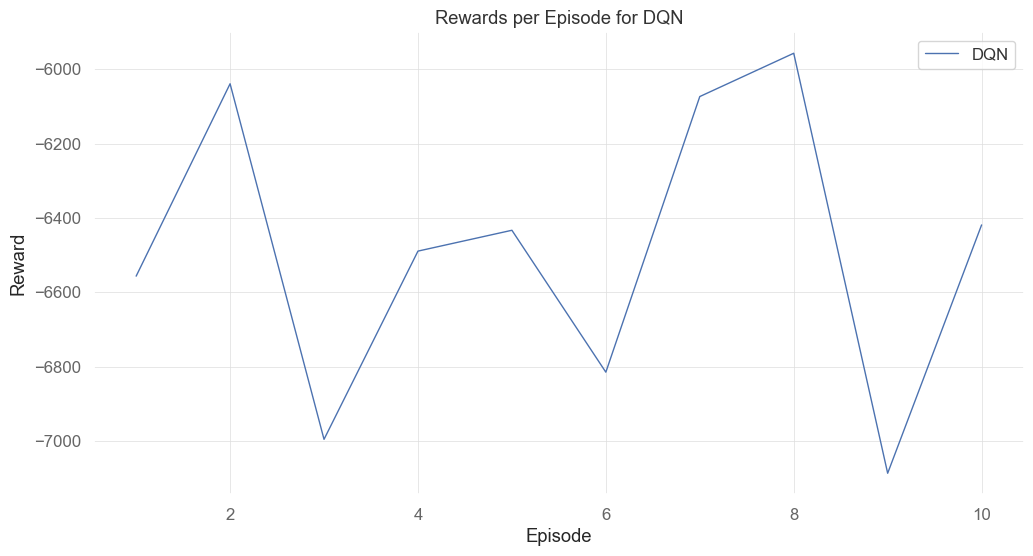

Training PPO model…



model.learn():   0%|          | 0/100 [00:00<?, ?it/s]
model.learn(): 200it [00:00, 1072.01it/s]             
model.learn(): 400it [00:00, 1188.21it/s]
model.learn(): 600it [00:00, 1261.64it/s]
model.learn(): 800it [00:00, 1347.69it/s]
model.learn(): 1000it [00:00, 1344.31it/s]
model.learn(): 1200it [00:00, 1359.11it/s]
model.learn(): 1400it [00:01, 1386.92it/s]
model.learn(): 1600it [00:01, 1378.76it/s]
model.learn(): 1800it [00:01, 1344.96it/s]
model.learn(): 2000it [00:02, 753.16it/s] 

Testing:  10%|█         | 1/10 [00:02<00:24,  2.72s/it]


KeyboardInterrupt: 

In [14]:
def plot_rewards(rewards, model_name):
    plot_data[f"{model_name}_rewards"] = rewards
    plot_settings[f"{model_name}_rewards"] = {"label": model_name}
    rewards_data = pd.DataFrame(plot_data)
    plt.figure(figsize=(12, 6))
    for key in plot_data:
        if key == "x":
            continue
        plt.plot("x", key, data=rewards_data, linewidth=1, label=plot_settings[key]["label"])

    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title(f"Rewards per Episode for {model_name}")
    plt.legend()
    plt.show()
    
def train_and_get_rewards(model_name):
    print(f"Training {model_name} model…")

    if model_name == "PPO":
        model = PPO("MlpPolicy", env)
    elif model_name == "DQN":
        model = DQN("MlpPolicy", env,
            learning_rate=0.0005,
            buffer_size=50000,
            learning_starts=1000,
            batch_size=32,
            tau=1.0,
            gamma=0.99,
            train_freq=4,
            target_update_interval=1000,
            exploration_fraction=0.1,
            exploration_final_eps=0.05,
            verbose=0,
            device= "cuda")
    elif model_name == "A2C":
        model = A2C("MlpPolicy", env,
            learning_rate=0.0003,  
            gamma=0.95,  
            n_steps=5,
            vf_coef=0.5,  
            ent_coef=0.01,  
            max_grad_norm=0.5, 
            verbose=0)
    else:
        model = None

    rewards, info = utils.train_test_model(model, env, seed, total_learning_timesteps, total_num_episodes)
    _, _, avg_res = utils.get_results(rewards, model_name, print_results=True)

    profit = info[0]["total_profit"]
    # money_spent = env.unwrapped.get_money_spent()
    # money_left = env.unwrapped.get_wallet_value()
    # roi = 100 * (money_left - money_spent) / money_spent
    roi = (profit - 1) * 100
    
    print(f"Total Profit = {profit:.8f}")
    # print(f"Total Money Spent = {money_spent:.2f}")
    # print(f"Money Left = {money_left:.2f}")
    print(f"ROI = {roi:.2f}%")
    plot_rewards(rewards, model_name)
    
    # Plotting the rewards
   
train_and_get_rewards("DQN")
train_and_get_rewards("PPO")
train_and_get_rewards("A2C")

### Plotting the results

In [ ]:
data = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 6))
for key in plot_data:
    if key == "x":
        continue
    line = plt.plot("x", key, data=data, linewidth=1, label=plot_settings[key]["label"])


plt.xlabel("episode")
plt.ylabel("reward")
plt.title("Random vs Agents")
plt.legend()
plt.show()